<a href="https://colab.research.google.com/github/chayakonchanlun/Multvariate/blob/main/Chapter3_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA (Principle Component Analysis)

Standardizing the Data (ปรับ mean และ std ให้ มี mean=0 std=1)

Calculating the covariance matrix (หา covariance matrix ของข้อมูลของเรา)

Computing the Eigenvectors and Eigenvalues (คำนวณ eigen values-vectors)

Picking Principal Components Using the Explained Variance (เลือกมาเฉพาะ eigens ที่จำเป็น)

Project Data Onto Lower-Dimensional Linear Subspace (map data ไปบนแกนใหม่)

# PCA Step by Step

In [1]:
import pandas as pd

In [2]:
# LOAD DATA

In [3]:
example_df = pd.read_csv('https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')

In [4]:
example_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


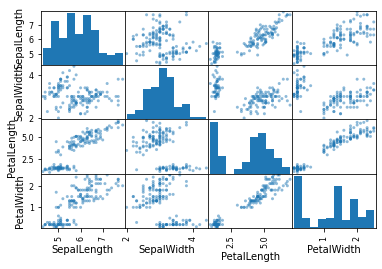

In [5]:
pd.plotting.scatter_matrix(example_df);

In [6]:
import numpy as np

In [7]:
data_matrix = np.array(example_df.iloc[:,:-1])
data_matrix

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
data_matrix = data_matrix.T
print(data_matrix.shape)
data_matrix

(4, 150)


array([[5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
        4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
        5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
        5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
        6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
        6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
        6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
        6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
        6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
        7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
        7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
        6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9],
       [3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
        3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       

# 1. Stranardizing the data (ปรับ mean และ std ให้มี mean=0 std=1)¶

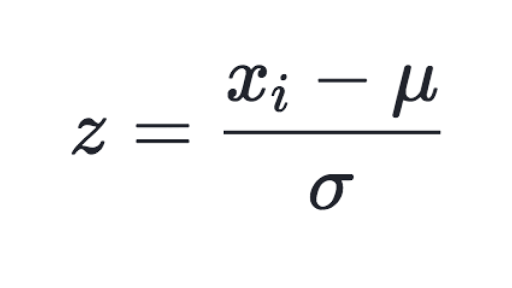

# วิธีซับซ้อน

In [9]:
meanD = np.mean(data_matrix,axis=1)
meanD

array([5.84333333, 3.054     , 3.75866667, 1.19866667])

In [10]:
stdD = np.std(data_matrix,axis=1)
stdD

array([0.82530129, 0.43214658, 1.75852918, 0.76061262])

In [11]:
zeromatrix = np.zeros((4,10))
zeromatrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [12]:
zeromatrix-meanD

ValueError: ignored

In [13]:
zeromatrix-meanD.reshape((4,1)) ## reshape บังคับขนาดของ matrix ให้เป็นไปตามที่เราต้องการ

array([[-5.84333333, -5.84333333, -5.84333333, -5.84333333, -5.84333333,
        -5.84333333, -5.84333333, -5.84333333, -5.84333333, -5.84333333],
       [-3.054     , -3.054     , -3.054     , -3.054     , -3.054     ,
        -3.054     , -3.054     , -3.054     , -3.054     , -3.054     ],
       [-3.75866667, -3.75866667, -3.75866667, -3.75866667, -3.75866667,
        -3.75866667, -3.75866667, -3.75866667, -3.75866667, -3.75866667],
       [-1.19866667, -1.19866667, -1.19866667, -1.19866667, -1.19866667,
        -1.19866667, -1.19866667, -1.19866667, -1.19866667, -1.19866667]])

In [14]:
##เลื่อน mean มาที่ 0

data_matrix_m0 = data_matrix - meanD.reshape((4,1))
data_matrix_m0

array([[-7.43333333e-01, -9.43333333e-01, -1.14333333e+00,
        -1.24333333e+00, -8.43333333e-01, -4.43333333e-01,
        -1.24333333e+00, -8.43333333e-01, -1.44333333e+00,
        -9.43333333e-01, -4.43333333e-01, -1.04333333e+00,
        -1.04333333e+00, -1.54333333e+00, -4.33333333e-02,
        -1.43333333e-01, -4.43333333e-01, -7.43333333e-01,
        -1.43333333e-01, -7.43333333e-01, -4.43333333e-01,
        -7.43333333e-01, -1.24333333e+00, -7.43333333e-01,
        -1.04333333e+00, -8.43333333e-01, -8.43333333e-01,
        -6.43333333e-01, -6.43333333e-01, -1.14333333e+00,
        -1.04333333e+00, -4.43333333e-01, -6.43333333e-01,
        -3.43333333e-01, -9.43333333e-01, -8.43333333e-01,
        -3.43333333e-01, -9.43333333e-01, -1.44333333e+00,
        -7.43333333e-01, -8.43333333e-01, -1.34333333e+00,
        -1.44333333e+00, -8.43333333e-01, -7.43333333e-01,
        -1.04333333e+00, -7.43333333e-01, -1.24333333e+00,
        -5.43333333e-01, -8.43333333e-01,  1.15666667e+0

In [15]:
from matplotlib import pyplot as plt

(array([ 9., 13., 23., 20., 18., 16., 21., 17.,  5.,  2.,  6.]),
 array([4.3       , 4.62727273, 4.95454545, 5.28181818, 5.60909091,
        5.93636364, 6.26363636, 6.59090909, 6.91818182, 7.24545455,
        7.57272727, 7.9       ]),
 <a list of 11 Patch objects>)

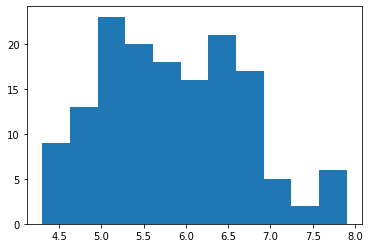

In [16]:
plt.hist(data_matrix[0,:],bins = 'rice')

(array([ 9., 13., 23., 20., 18., 16., 21., 17.,  5.,  2.,  6.]),
 array([-1.54333333, -1.21606061, -0.88878788, -0.56151515, -0.23424242,
         0.0930303 ,  0.42030303,  0.74757576,  1.07484848,  1.40212121,
         1.72939394,  2.05666667]),
 <a list of 11 Patch objects>)

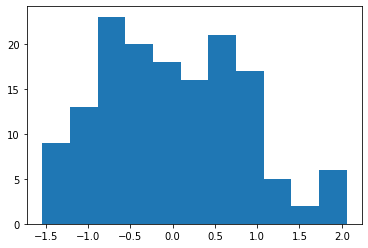

In [17]:
plt.hist(data_matrix_m0[0,:],bins = 'rice')

In [18]:
data_matrix_m0_std1 = data_matrix_m0/stdD.reshape((4,1))

(array([ 9., 13., 23., 20., 18., 16., 21., 17.,  5.,  2.,  6.]),
 array([-1.87002413, -1.47347474, -1.07692535, -0.68037595, -0.28382656,
         0.11272284,  0.50927223,  0.90582163,  1.30237102,  1.69892041,
         2.09546981,  2.4920192 ]),
 <a list of 11 Patch objects>)

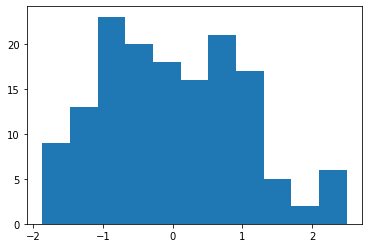

In [19]:
plt.hist(data_matrix_m0_std1[0,:],bins = 'rice')

(array([ 9., 13., 23., 20., 18., 16., 21., 17.,  5.,  2.,  6.]),
 array([-1.54333333, -1.21606061, -0.88878788, -0.56151515, -0.23424242,
         0.0930303 ,  0.42030303,  0.74757576,  1.07484848,  1.40212121,
         1.72939394,  2.05666667]),
 <a list of 11 Patch objects>)

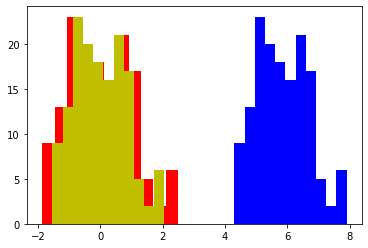

In [20]:
plt.hist(data_matrix[0,:], bins = 'rice', color ='b')
plt.hist(data_matrix_m0_std1[0,:], bins = 'rice', color ='r')
plt.hist(data_matrix_m0[0,:], bins = 'rice', color ='y')


(array([ 9., 13., 23., 20., 18., 16., 21., 17.,  5.,  2.,  6.]),
 array([-1.54333333, -1.21606061, -0.88878788, -0.56151515, -0.23424242,
         0.0930303 ,  0.42030303,  0.74757576,  1.07484848,  1.40212121,
         1.72939394,  2.05666667]),
 <a list of 11 Patch objects>)

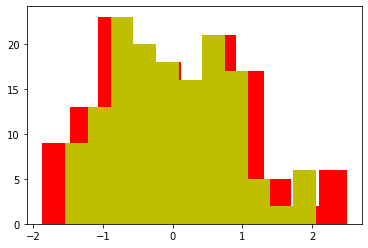

In [21]:
plt.hist(data_matrix_m0_std1[0,:], bins = 'rice', color ='r')
plt.hist(data_matrix_m0[0,:], bins = 'rice', color ='y')

In [22]:
data_matrix_m0_std1

array([[-9.00681170e-01, -1.14301691e+00, -1.38535265e+00,
        -1.50652052e+00, -1.02184904e+00, -5.37177559e-01,
        -1.50652052e+00, -1.02184904e+00, -1.74885626e+00,
        -1.14301691e+00, -5.37177559e-01, -1.26418478e+00,
        -1.26418478e+00, -1.87002413e+00, -5.25060772e-02,
        -1.73673948e-01, -5.37177559e-01, -9.00681170e-01,
        -1.73673948e-01, -9.00681170e-01, -5.37177559e-01,
        -9.00681170e-01, -1.50652052e+00, -9.00681170e-01,
        -1.26418478e+00, -1.02184904e+00, -1.02184904e+00,
        -7.79513300e-01, -7.79513300e-01, -1.38535265e+00,
        -1.26418478e+00, -5.37177559e-01, -7.79513300e-01,
        -4.16009689e-01, -1.14301691e+00, -1.02184904e+00,
        -4.16009689e-01, -1.14301691e+00, -1.74885626e+00,
        -9.00681170e-01, -1.02184904e+00, -1.62768839e+00,
        -1.74885626e+00, -1.02184904e+00, -9.00681170e-01,
        -1.26418478e+00, -9.00681170e-01, -1.50652052e+00,
        -6.58345429e-01, -1.02184904e+00,  1.40150837e+0

In [23]:
np.mean(data_matrix_m0_std1,axis=1)

array([-4.73695157e-16, -6.63173220e-16,  3.31586610e-16, -2.84217094e-16])

In [24]:
np.std(data_matrix_m0_std1,axis=1)

array([1., 1., 1., 1.])

## **วิธีแบบเร็ว**

In [25]:
from scipy import stats

In [26]:
stats.zscore(data_matrix,axis=1)

array([[-9.00681170e-01, -1.14301691e+00, -1.38535265e+00,
        -1.50652052e+00, -1.02184904e+00, -5.37177559e-01,
        -1.50652052e+00, -1.02184904e+00, -1.74885626e+00,
        -1.14301691e+00, -5.37177559e-01, -1.26418478e+00,
        -1.26418478e+00, -1.87002413e+00, -5.25060772e-02,
        -1.73673948e-01, -5.37177559e-01, -9.00681170e-01,
        -1.73673948e-01, -9.00681170e-01, -5.37177559e-01,
        -9.00681170e-01, -1.50652052e+00, -9.00681170e-01,
        -1.26418478e+00, -1.02184904e+00, -1.02184904e+00,
        -7.79513300e-01, -7.79513300e-01, -1.38535265e+00,
        -1.26418478e+00, -5.37177559e-01, -7.79513300e-01,
        -4.16009689e-01, -1.14301691e+00, -1.02184904e+00,
        -4.16009689e-01, -1.14301691e+00, -1.74885626e+00,
        -9.00681170e-01, -1.02184904e+00, -1.62768839e+00,
        -1.74885626e+00, -1.02184904e+00, -9.00681170e-01,
        -1.26418478e+00, -9.00681170e-01, -1.50652052e+00,
        -6.58345429e-01, -1.02184904e+00,  1.40150837e+0

2. Calculating the covariance matrix (หา covariance matrix ของข้อมูลของเรา)bold text

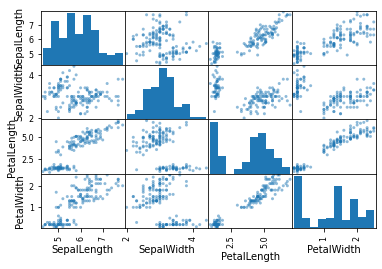

In [27]:
pd.plotting.scatter_matrix(example_df);

In [28]:
data_cov = np.cov(data_matrix_m0_std1)
data_cov

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

## 3. คำนวณ eigen_value และ eigen **vector**

In [29]:
eigen_values , eigen_vectors = np.linalg.eig(data_cov)
eigen_values
eigen_vectors

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

4. Picking Principal Components Using the Explained Variance
## คำนวนว่า แต่ละ eigen vector อธิบายข้อมูลทั้งหมด **ได้ดีแค่ไหน**

In [30]:
variance_explained = []
for i in eigen_values: 
    variance_explained.append((i/sum(eigen_values))*100)

print(variance_explained)

[72.77045209380132, 23.03052326768066, 3.6838319576273824, 0.5151926808906327]


In [31]:
cumulative_variance_explained = np.cumsum(variance_explained)
print(cumulative_variance_explained)

[ 72.77045209  95.80097536  99.48480732 100.        ]


In [32]:
selected_eigen_vectors = eigen_vectors[:,:2]
selected_eigen_vectors

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

# 5.Project Data Onto Lower-Dimensional Linear Subspace

In [33]:
X = data_matrix_m0_std1
X.shape

(4, 150)

In [34]:
W = selected_eigen_vectors
W.shape

(4, 2)

In [35]:
X_pca = X.T.dot(W)
X_pca

array([[-2.26454173e+00, -5.05703903e-01],
       [-2.08642550e+00,  6.55404729e-01],
       [-2.36795045e+00,  3.18477311e-01],
       [-2.30419716e+00,  5.75367713e-01],
       [-2.38877749e+00, -6.74767397e-01],
       [-2.07053681e+00, -1.51854856e+00],
       [-2.44571134e+00, -7.45626750e-02],
       [-2.23384186e+00, -2.47613932e-01],
       [-2.34195768e+00,  1.09514636e+00],
       [-2.18867576e+00,  4.48629048e-01],
       [-2.16348656e+00, -1.07059558e+00],
       [-2.32737775e+00, -1.58587455e-01],
       [-2.22408272e+00,  7.09118158e-01],
       [-2.63971626e+00,  9.38281982e-01],
       [-2.19229151e+00, -1.88997851e+00],
       [-2.25146521e+00, -2.72237108e+00],
       [-2.20275048e+00, -1.51375028e+00],
       [-2.19017916e+00, -5.14304308e-01],
       [-1.89407429e+00, -1.43111071e+00],
       [-2.33994907e+00, -1.15803343e+00],
       [-1.91455639e+00, -4.30465163e-01],
       [-2.20464540e+00, -9.52457317e-01],
       [-2.77416979e+00, -4.89517027e-01],
       [-1.

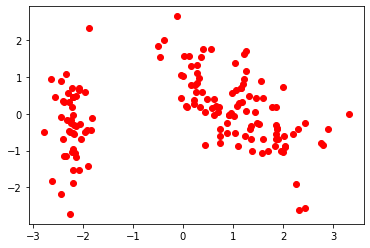

In [36]:
plt.plot(X_pca[:,0],X_pca[:,1],'or')

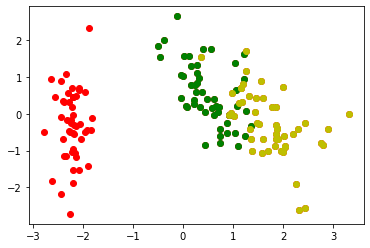

In [37]:
plt.plot(X_pca[:,0],X_pca[:,1],'or')
plt.plot(X_pca[50:100,0],X_pca[50:100,1],'og')
plt.plot(X_pca[100:,0],X_pca[100:,1],'oy')

# PCA

import

In [38]:
from sklearn.decomposition import PCA

In [39]:
pca = PCA(n_components=2)

In [40]:
#Fit - transform
new_pca =pca.fit_transform
new_pca

<bound method PCA.fit_transform of PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)>

In [41]:
new_pca = pca.fit_transform(X.T)
new_pca

array([[-2.26454173e+00,  5.05703903e-01],
       [-2.08642550e+00, -6.55404729e-01],
       [-2.36795045e+00, -3.18477311e-01],
       [-2.30419716e+00, -5.75367713e-01],
       [-2.38877749e+00,  6.74767397e-01],
       [-2.07053681e+00,  1.51854856e+00],
       [-2.44571134e+00,  7.45626750e-02],
       [-2.23384186e+00,  2.47613932e-01],
       [-2.34195768e+00, -1.09514636e+00],
       [-2.18867576e+00, -4.48629048e-01],
       [-2.16348656e+00,  1.07059558e+00],
       [-2.32737775e+00,  1.58587455e-01],
       [-2.22408272e+00, -7.09118158e-01],
       [-2.63971626e+00, -9.38281982e-01],
       [-2.19229151e+00,  1.88997851e+00],
       [-2.25146521e+00,  2.72237108e+00],
       [-2.20275048e+00,  1.51375028e+00],
       [-2.19017916e+00,  5.14304308e-01],
       [-1.89407429e+00,  1.43111071e+00],
       [-2.33994907e+00,  1.15803343e+00],
       [-1.91455639e+00,  4.30465163e-01],
       [-2.20464540e+00,  9.52457317e-01],
       [-2.77416979e+00,  4.89517027e-01],
       [-1.

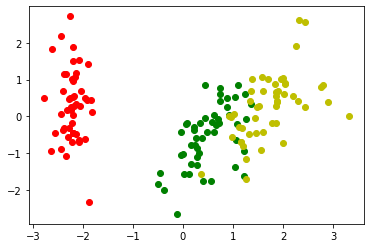

In [42]:
plt.plot(new_pca[:50,0],new_pca[:50,1],'or')
plt.plot(new_pca[50:100,0],new_pca[50:100,1],'og')
plt.plot(new_pca[100:,0],new_pca[100:,1],'oy')

## วันที่ 8 มีนาคม **2564**

In [51]:
import pandas as pd

In [52]:
data=pd.read_csv('nndb_flat.csv')
data

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,Finfish and Shellfish Products,"MACKEREL,SALTED","Fish, mackerel, salted",NaN,NaN,NaN,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,2.38,15.0,3.300,0.190,0.020,66.0,0.100,1.40,60.0,0.000,254.0,73.4,1.10,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,90240,Finfish and Shellfish Products,"SCALLOP,(BAY&SEA),CKD,STMD","Mollusks, scallop, (bay and sea), cooked, steamed",NaN,NaN,NaN,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,0.00,20.0,1.076,0.024,0.012,10.0,0.033,0.58,37.0,0.029,426.0,21.7,1.55,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,90480,Sweets,"SYRUP,CANE","Syrup, Cane",NaN,NaN,NaN,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.00,0.0,0.100,0.060,0.130,13.0,0.020,3.60,10.0,0.000,8.0,0.7,0.19,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90560,Finfish and Shellfish Products,"SNAIL,RAW","Mollusks, snail, raw",NaN,NaN,NaN,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,5.00,6.0,1.400,0.120,0.010,10.0,0.400,3.50,250.0,0.000,272.0,27.4,1.00,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


## ตรวจสอบขนาดของข้อมูลว่ามี data กี่ตัว และมีกี่ **dimensions**

In [53]:
data.shape

(8618, 45)

## ลอง plot scatter matrix เพื่อดูการกระจายของ data **ในมุมมองต่างๆ**

In [54]:
## ลอง  plot scatter matrix เพื่อดูการกระจายของ data ในมุมมองต่างๆ

เนื่องจาก Data มี dimension มากเกินไป เราจะทดสอบดูว่า column ใด ให้ข้อมูลซ้ำกับ column อื่น แล้วลบมันออก¶
## **เลือกมาทำต่อเฉพาะข้อมูลที่เป็นตัวเลข**

In [55]:
newdata = data.iloc[:,7:]
newdata.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


## ตรวจสอบว่า ระหว่าง columns มี correlation กันมากน้อยแค่ไหน ด้วย **numpy**

In [56]:
import numpy as np

In [57]:
corr = np.corrcoef(newdata.to_numpy().T)

In [58]:
corr.shape

(38, 38)

In [59]:
corr

array([[1.        , 0.11030203, 0.80679472, ..., 0.19518065, 0.05667274,
        0.11276635],
       [0.11030203, 1.        , 0.05471538, ..., 0.44460761, 0.37836917,
        0.41631538],
       [0.80679472, 0.05471538, 1.        , ..., 0.06608644, 0.03755914,
        0.02826352],
       ...,
       [0.19518065, 0.44460761, 0.06608644, ..., 1.        , 0.22368557,
        0.26657694],
       [0.05667274, 0.37836917, 0.03755914, ..., 0.22368557, 1.        ,
        0.20529859],
       [0.11276635, 0.41631538, 0.02826352, ..., 0.26657694, 0.20529859,
        1.        ]])

In [60]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')

row = 10 column = 27 corrcoef = 1.0
row = 12 column = 29 corrcoef = 1.0
row = 13 column = 30 corrcoef = 1.0
row = 14 column = 31 corrcoef = 1.0
row = 18 column = 34 corrcoef = 1.0
row = 20 column = 35 corrcoef = 1.0
row = 22 column = 37 corrcoef = 1.0
row = 27 column = 10 corrcoef = 1.0
row = 29 column = 12 corrcoef = 1.0
row = 30 column = 13 corrcoef = 1.0
row = 31 column = 14 corrcoef = 1.0
row = 34 column = 18 corrcoef = 1.0
row = 35 column = 20 corrcoef = 1.0
row = 37 column = 22 corrcoef = 1.0


In [61]:
newdata.iloc[:5,11:29]

,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA
0,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075
1,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075
2,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000
3,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900
4,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500


In [62]:
from matplotlib import pyplot as plt


## data ที่มี correlation เป็น **1**

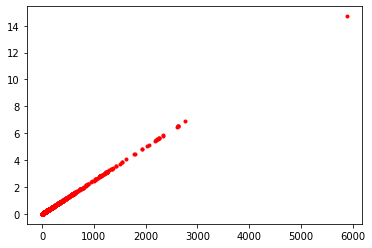

In [63]:
plt.plot(newdata.iloc[:,11],newdata.iloc[:,28],'r.')

## data ที่มี correlation **เป็นค่าอื่นๆ**

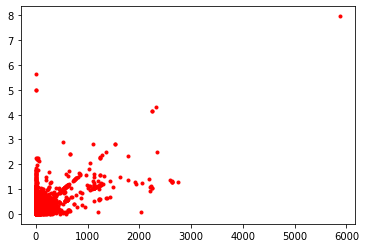

In [64]:
plt.plot(newdata.iloc[:,11],newdata.iloc[:,29],'r.')

## Quiz1 ลบ columns ที่มีค่า correlation เป็น 1 เมื่อเทียบกับ column **อื่น**

In [65]:
newdata_dropped = newdata.drop(['VitE_mg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'], axis=1)
newdata_dropped

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [66]:
data_dropped = data.drop(['ID','ShortDescrip','Descrip','CommonName','MfgName','ScientificName','VitE_mg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'], axis=1)
data_dropped

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,Dairy and Egg Products,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,Dairy and Egg Products,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,Dairy and Egg Products,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,Dairy and Egg Products,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,Dairy and Egg Products,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,Finfish and Shellfish Products,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,Finfish and Shellfish Products,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,Sweets,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,Finfish and Shellfish Products,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


## ทดลอง plot กราฟ parallel **cooedinate**

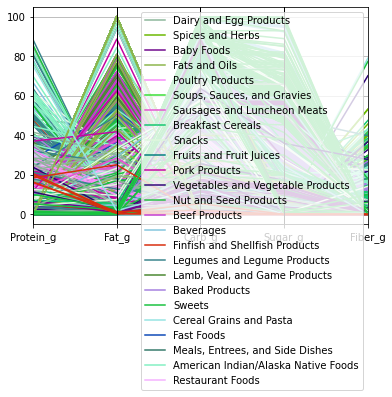

In [67]:
pd.plotting.parallel_coordinates(data_dropped,'FoodGroup',cols=['Protein_g','Fat_g','Carb_g','Sugar_g',	'Fiber_g'])

## ทำ PCA เพื่อลดจำนวน Dimension **ของข้อมูล**

    รายการในลิสต์
    รายการในลิสต์

In [68]:
from sklearn.decomposition import PCA

In [69]:
pca = PCA(n_components=2)

In [70]:
new_pca = pca.fit_transform(newdata_dropped.to_numpy())

In [71]:
new_pca.shape

(8618, 2)

In [72]:
new_pca

array([[ 590.95286674,   85.56968946],
       [ 590.95284476,   85.57159456],
       [ 747.5994042 ,  117.79120834],
       ...,
       [ -95.72739188,  -53.51885094],
       [ -66.70492177, -118.10632681],
       [ -65.40356382,  -28.88067151]])

## **หาค่าที่เป็นไปได้ทั้งหมด**

In [74]:
FG = set(data['FoodGroup'])
FG

{'American Indian/Alaska Native Foods',
 'Baby Foods',
 'Baked Products',
 'Beef Products',
 'Beverages',
 'Breakfast Cereals',
 'Cereal Grains and Pasta',
 'Dairy and Egg Products',
 'Fast Foods',
 'Fats and Oils',
 'Finfish and Shellfish Products',
 'Fruits and Fruit Juices',
 'Lamb, Veal, and Game Products',
 'Legumes and Legume Products',
 'Meals, Entrees, and Side Dishes',
 'Nut and Seed Products',
 'Pork Products',
 'Poultry Products',
 'Restaurant Foods',
 'Sausages and Luncheon Meats',
 'Snacks',
 'Soups, Sauces, and Gravies',
 'Spices and Herbs',
 'Sweets',
 'Vegetables and Vegetable Products'}


## สร้าง Dictionary เพื่อแทนค่าที่เป็น text ให้เป็นตัวเลข เพื่อจะได้ plot **สีได้**

In [75]:
color_list = {}
num = 0
for each_fg in FG:
    if each_fg not in color_list:
        color_list[each_fg] = num
        num += 1

In [76]:
color_list

{'American Indian/Alaska Native Foods': 17,
 'Baby Foods': 12,
 'Baked Products': 20,
 'Beef Products': 22,
 'Beverages': 24,
 'Breakfast Cereals': 6,
 'Cereal Grains and Pasta': 7,
 'Dairy and Egg Products': 5,
 'Fast Foods': 1,
 'Fats and Oils': 0,
 'Finfish and Shellfish Products': 13,
 'Fruits and Fruit Juices': 9,
 'Lamb, Veal, and Game Products': 23,
 'Legumes and Legume Products': 10,
 'Meals, Entrees, and Side Dishes': 21,
 'Nut and Seed Products': 19,
 'Pork Products': 18,
 'Poultry Products': 2,
 'Restaurant Foods': 11,
 'Sausages and Luncheon Meats': 8,
 'Snacks': 4,
 'Soups, Sauces, and Gravies': 16,
 'Spices and Herbs': 14,
 'Sweets': 15,
 'Vegetables and Vegetable Products': 3}

### แทนค่า text ใน Dictionary **ด้วยตัวเลขที่เรากำหนด**

In [78]:
data_dropped2 = data_dropped.replace(color_list)

In [79]:
data_dropped2

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,5,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,5,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,5,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,5,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,5,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,13,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,13,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,15,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,13,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


## Plot กราฟ **Scatter**

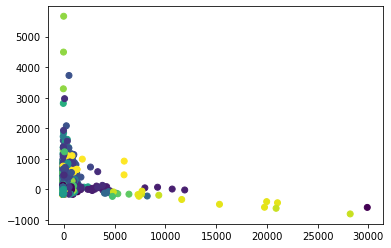

In [80]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_dropped2['FoodGroup'])

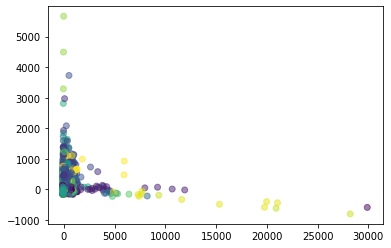

In [81]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_dropped2['FoodGroup'],alpha=0.5)

## ทดลอง เปรียบเทียบค่าสารอาหาร baby food และ **sweet**

In [82]:
bb = data_dropped2[(data_dropped2['FoodGroup']==24) | (data_dropped2['FoodGroup']==9)]  ## ใช้  | และ  &  แทน  or  และ  and  ใน pandas
bb


,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
2168,9,32.0,0.40,0.30,7.69,0.00,1.1,38.0,0.009,0.0,1677.6,14.0,12.0,0.086,0.20,0.000,0.6,0.042222,0.005294,0.00,18.640000,0.000000,0.0350,0.025000,0.046154,0.016667,0.010000,0.000096,0.042857,0.015714,0.010909,0.009091
2169,9,23.0,0.40,0.30,4.80,4.50,0.3,25.0,0.004,0.0,1600.0,14.0,10.0,0.086,0.50,0.000,0.1,0.027778,0.002353,0.00,17.777778,0.012000,0.0350,0.025000,0.046154,0.016667,0.008333,0.000096,0.028571,0.012857,0.001818,0.009091
2170,9,52.0,0.26,0.17,13.81,10.39,2.4,3.0,0.041,0.0,4.6,3.0,6.0,0.027,0.12,0.035,0.0,0.003333,0.024118,0.00,0.051111,0.012000,0.0075,0.005687,0.020000,0.014167,0.005000,0.000030,0.011905,0.015714,0.000000,0.003636
2171,9,48.0,0.27,0.13,12.76,10.10,1.3,2.0,0.037,0.0,4.0,0.0,5.0,0.031,0.07,0.038,0.0,0.002222,0.021765,0.00,0.044444,0.003333,0.0000,0.005687,0.021538,0.015833,0.004167,0.000034,0.009524,0.015714,0.000000,0.004545
2172,9,53.0,0.26,0.36,13.64,11.01,2.4,2.0,0.044,0.0,0.2,1.0,5.0,0.035,0.19,0.118,0.3,0.002222,0.025882,0.00,0.002222,0.003333,0.0025,0.005938,0.009231,0.013333,0.004167,0.000039,0.007143,0.011429,0.005455,0.003636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,24,509.0,1.96,29.10,59.94,59.00,0.5,1.0,0.000,0.0,0.0,1.0,18.0,0.011,0.06,0.011,0.9,0.001111,0.000000,0.00,0.000000,0.017333,0.0025,0.011750,0.000000,0.000000,0.015000,0.000012,0.004762,0.192857,0.016364,0.001818
8560,24,19.0,0.10,0.00,4.70,4.60,0.1,0.0,0.019,0.0,32.0,0.0,10.0,0.007,0.06,0.014,0.1,0.000000,0.011176,0.00,0.355556,0.018000,0.0000,0.001750,0.005385,0.002500,0.008333,0.000008,0.007143,0.001429,0.001818,0.001818
8572,24,134.0,0.50,0.00,5.00,0.00,0.0,0.0,0.000,0.0,0.0,0.0,5.0,0.009,0.10,0.000,1.4,0.000000,0.000000,0.00,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.004167,0.000010,0.014286,0.008571,0.025455,0.001818
8580,24,141.0,5.16,4.52,19.88,8.33,0.0,149.0,0.198,0.6,11.9,67.0,79.0,0.198,1.79,0.516,7.1,0.165556,0.116471,0.25,0.132222,0.089333,0.1675,0.124000,0.131538,0.125833,0.065833,0.000220,0.095238,0.112857,0.129091,0.137273


In [83]:
pca = PCA(n_components=2)
new_pca = pca.fit_transform(bb.iloc[:,1:].to_numpy())

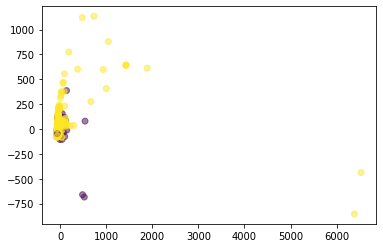

In [84]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = bb['FoodGroup'],alpha=0.5)

## 2 Principle components **เป็นตัวแทนของข้อมูลได้ดีแค่ไหน**

In [85]:
pca.explained_variance_ratio_

array([0.79492374, 0.09939201])